In [1]:
import random
import math
import matplotlib.pyplot as plt
import statistics

In [2]:
f_optimize_sigma = False
sigma_def = 8

In [3]:
rng = [0, 100]
dlt = 0.05
n_samples = 300
def genSamples(center):
    samples = []
    for i in range(n_samples):
        #samples.append(random.uniform(rng[0] + (rng[1]-rng[0])*0.1, rng[1] - (rng[1]-rng[0])*0.1))
        if i % 5 == 0:
            samples.append(rng[0] + (rng[1]-rng[0])*center)
        else:
            samples.append(random.uniform(rng[0], rng[1]))
        #samples.append(random.uniform(rng[0], rng[1]))
        #samples.append(random.gauss((rng[0]+rng[1])/2.0, (rng[1]-rng[0])/2.0 * 0.1))
    return samples
samples1 = genSamples(0.4)
samples2 = genSamples(0.6)
print("sample1:")
print("max: " + str(max(samples1)))
print("min: " + str(min(samples1)))
print("sample2:")
print("max: " + str(max(samples2)))
print("min: " + str(min(samples2)))

sample1:
max: 99.66779653761454
min: 0.633809707685451
sample2:
max: 99.40226914557867
min: 0.18456872737422358


In [4]:
sigma_opt = lambda s: statistics.variance(s) * math.pow(4.0/3.0/len(s), 1.0/5.0)
k = lambda x1, x2, sigma=sigma_def: math.exp(-(x1 - x2)**2/sigma/sigma)
x = rng[0]
N = int((rng[1]-rng[0])/dlt+1)
x_axis = [rng[0] + i * dlt for i in range(N)]

def estPDF(samples):
    x = rng[0]
    p = [0] * N
    sigma = sigma_opt(samples) if f_optimize_sigma else sigma_def
    for i in range(N):
        x = rng[0] + i * dlt
        for s in samples:
            p[i] += k(x, s, sigma)
    sum_p = sum(p) * dlt
    for i in range(len(p)):
        p[i] /= sum_p
    return p
def showPDF(p, title, ylim=None):
    plt.scatter(x_axis, p)
    plt.ylabel(title)
    if ylim != None:
        plt.ylim(0, ylim)
    plt.show()
    print('sum: ' + str(sum(p)*dlt))

In [5]:
p1 = estPDF(samples1)
p2 = estPDF(samples2)

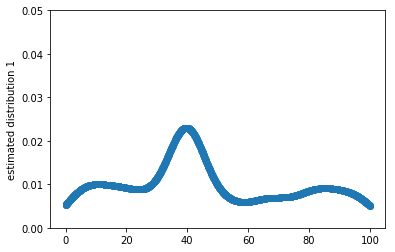

sum: 1.000000000000002


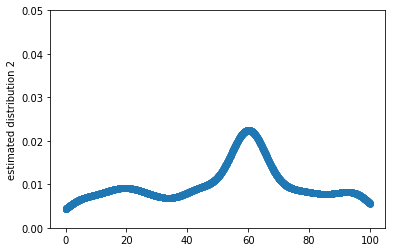

sum: 1.0000000000000009


In [6]:
showPDF(p1, 'estimated distribution 1', 0.05)
showPDF(p2, 'estimated distribution 2', 0.05)

# naive way
just calculate the average distance

In [9]:
total = 0
for a in samples1:
    for b in samples2:
        total += math.fabs(a - b)
total = total / n_samples / n_samples
total

32.06730287600616

In [10]:
total = 0
for a in samples1:
    b = samples2[random.randrange(0, n_samples)]
    total += math.fabs(a - b)
total = total / n_samples
total

31.56487013106671